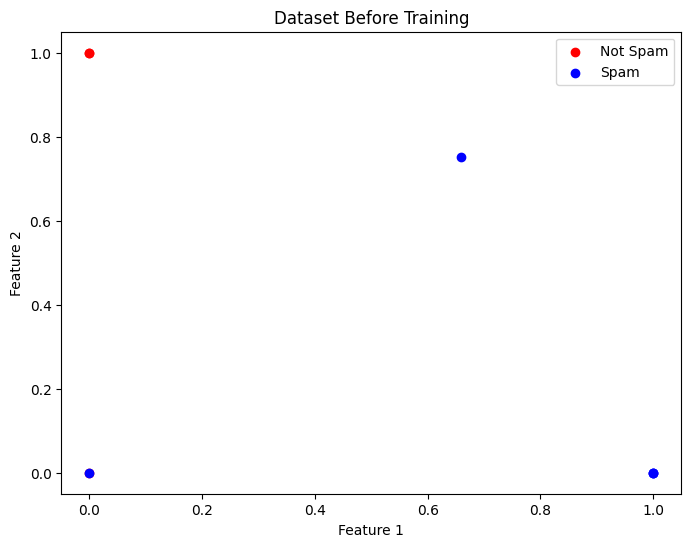

Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.67      0.80         3

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



c:\Users\Owner\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Owner\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Owner\anaconda3\envs\ml_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


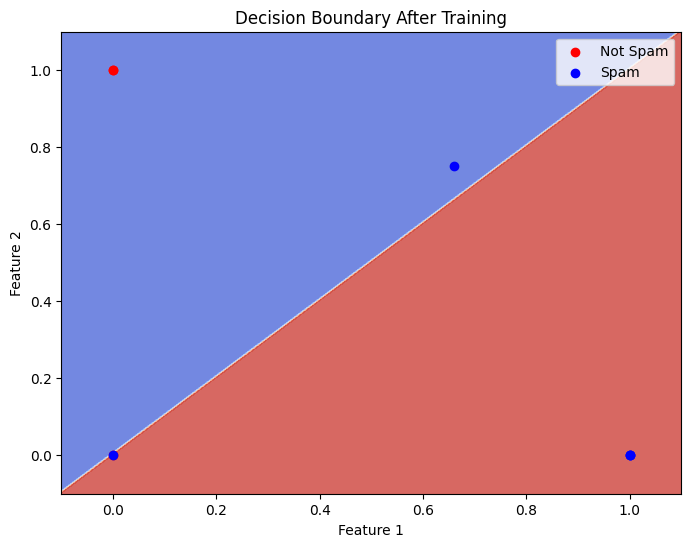

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# Step 1: Load the SMS Spam dataset
data = pd.DataFrame({
    "message": [
        "Free entry in 2 a weekly competition to win FA Cup final tickets!",
        "Call us now to claim your free prize!",
        "Hey, are we still meeting for lunch?",
        "URGENT! Your mobile number has been selected for a $5000 prize.",
        "Can you send me the project file?",
        "Congratulations, you have won a free vacation to the Bahamas!",
        "Don't forget the meeting tomorrow at 10am.",
        "Win a free laptop by entering our competition now!"
    ],
    "label": [
        1, 1, 0, 1, 0, 1, 0, 1
    ]  # 1 = Spam, 0 = Not Spam
})

# Step 2: Preprocess the text data
vectorizer = TfidfVectorizer(max_features=2)  # Use only 2 features for visualization
X = vectorizer.fit_transform(data["message"]).toarray()
y = data["label"].values

# Visualize the dataset before training
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", label="Not Spam")
plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", label="Spam")
plt.title("Dataset Before Training")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train an SVM model
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 7: Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="red", label="Not Spam")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="blue", label="Spam")
    plt.title("Decision Boundary After Training")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(svm_model, X, y)
